# Envelopes

Examples of envelope calculations.

In [1]:
using Pkg
Pkg.activate("..")
using GeometryBasics
using PlotlyJS
using LinearAlgebra
using CoordinateTransformations
using Rotations

  Activating project at `~/MEGA/EMAP/Diagrams.jl`


WebIO._IJuliaInit()

## 3. Envelopes

Our Diagram can compose primitives. But we want to be able to do more complicated drawings.
For example, we might want to "glue" two primitives side by side.
To be able to do this, we need to know how much one primitive should be translated until it
touched only the "border" of the other.

Thus, it would be necessary to be able to compute this distance for each primitive.
This is what the author of the paper has called an *envelope*.

The envelope is a functional defined for each primitive, with
$env: V_2 \to \mathbb R$ where $V_2$ is a 2D vector.
This means that, when we define a primitive, we must also define it's envelope funciton.

**Def.(Envelope)** Given a diagram $D$ and a direction $v$,
$$
env_D(v) := \sup_{u \in D}\frac{\langle u,v\rangle}{||v||^2}.
$$

We call $\sup_{u \in D}\langle u,v\rangle$ the *support* function.

The nice thing about the envelope functional is that the envelope of a diagram $D = [p_1,p_2,...,p_n]$
is just $\max\{env(p_1),...,env(p_n)\}$, i.e. once we know how to compute the envelope of the primitives,
the envelope for the diagram can easily be found.

Let's use the `GeometricBasics.jl` package to define our primimtives. This package
has some geometric objects implemented, and some useful functionalities.

In [31]:
support(t::AbstractGeometry,v::Vector) = mapreduce(p->dot(p,v),max,coordinates(t))
envelope(t::AbstractGeometry, v::Vector) = support(t,normalize(v))

# translategeo(g::Polygon,p::Point) = Polygon(coordinates(g) .+ p)
transform(g::Polygon,T) = Polygon(map(T,coordinates(g)))

transform (generic function with 1 method)

In [32]:
a = Point(-1.5,-0.5)#+Point(10,10)
b = Point(0.5,1.5)
c = Point(1.0,-0.5)
v = [1,1]

t = Triangle(a,b,c)
l = Line(a,b)
r = Rect(0,0,2,2)

HyperRectangle{2, Int64}([0, 0], [2, 2])

In [33]:
v = [1,1]

θs = 0:0.05:2π
vs = [[cos(θ), sin(θ)] for θ in θs]
envs = hcat([envelope(t,i)i for i in vs]...);

In [34]:
function plotvec(v::Vector; kwargs...)
    scatter(x=[0,v[1]], y=[0,v[2]]; kwargs...)
end
function plottriangle(t::Triangle; kwargs...)
    tp = vcat(vcat(t.points'...),t.points[1]')
    scatter(x = tp[:,1],y = tp[:,2]; kwargs...)
end

function plotline(t::Line; kwargs...)
    tp = vcat(t.points'...)
    scatter(x = tp[:,1],y = tp[:,2]; kwargs...)
end

function plotrectangle(r::Rect; kwargs...)
    tp = collect(coordinates(r))
    # adjusting order of points.
    tp = tp[[1,2,4,3]]
    tp = mapreduce(x->[x[1],x[2]]', vcat, tp)
    
    tp = vcat(tp, tp[1,:]')
    scatter(x = tp[:,1],y = tp[:,2]; kwargs...)
end

function plotgeometry(g::AbstractGeometry; kwargs...)
    x = coordx(g)
    y = coordy(g)
    x = vcat(x,x[1])
    y = vcat(y,y[1])
    scatter(x=x,y=y; kwargs...)
end

function plotenvelope(g::AbstractGeometry;name="envelope", kwargs...)
    θs = 0:0.05:2π
    vs = [[cos(θ), sin(θ)] for θ in θs]
    envs = hcat([envelope(g,i)i for i in vs]...);
    scatter(x= envs[1,:],y = envs[2,:]; name = name, kwargs...)
end

coordx(t::AbstractGeometry) = [x[1] for x in coordinates(t)]
coordy(t::AbstractGeometry) = [x[2] for x in coordinates(t)]



layout = Layout(
    xaxis = attr(range = [-2, 2]),
    yaxis = attr(range = [-2, 2]),
    width = 600,
    height = 600
)

layout with fields height, margin, template, width, xaxis, and yaxis


In [16]:
# pv = plotvec(v,name="vector")
# pl = plotline(l, name = "line")
# pt = plottriangle(t,line=attr(width=1), name= "triangle")
# pr = plotrectangle(r, name="rectangle")

# plot([pv,pt,pl, pr],layout)

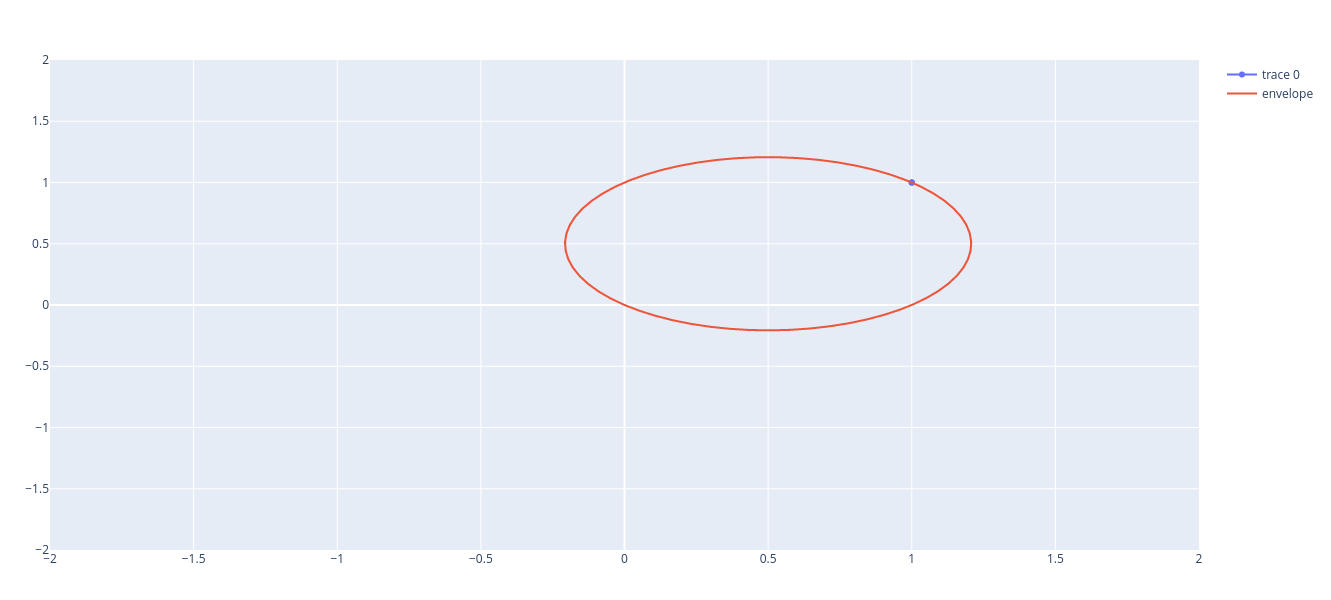

In [42]:
l  = Line(Point(1,1),Point(1,1))
pl = plotgeometry(l)
pe = plotenvelope(l)

plot([pl,pe], layout)

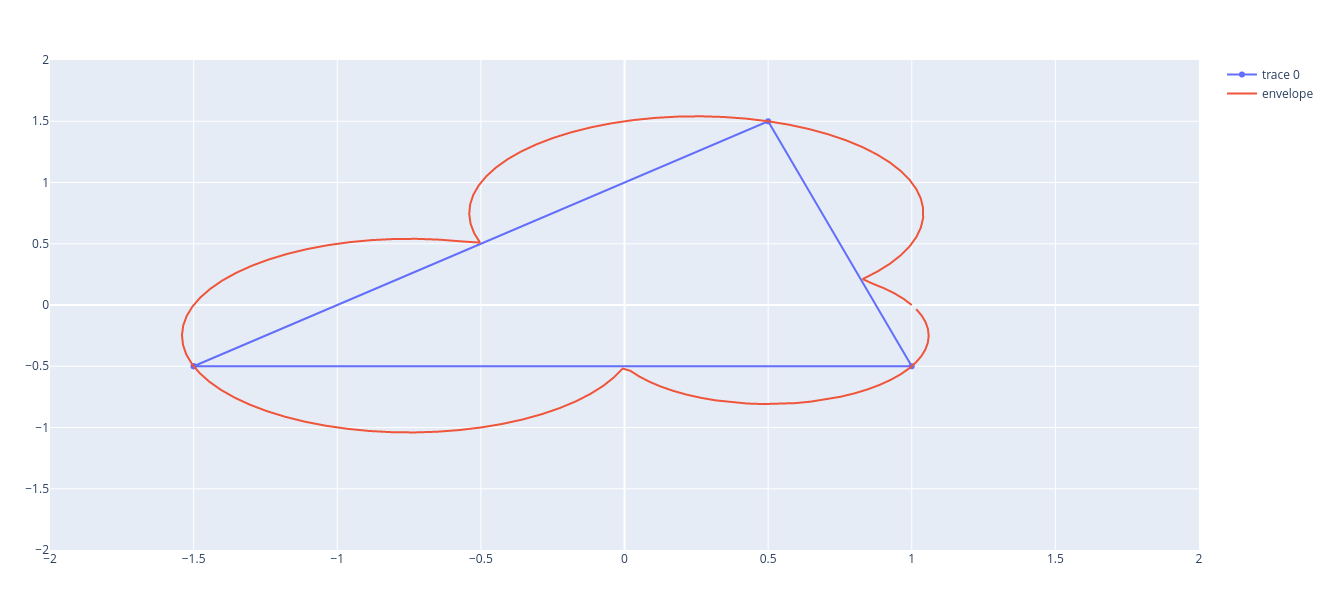

In [17]:
pt = plotgeometry(t)
pe = plotenvelope(t)

plot([pt,pe], layout)

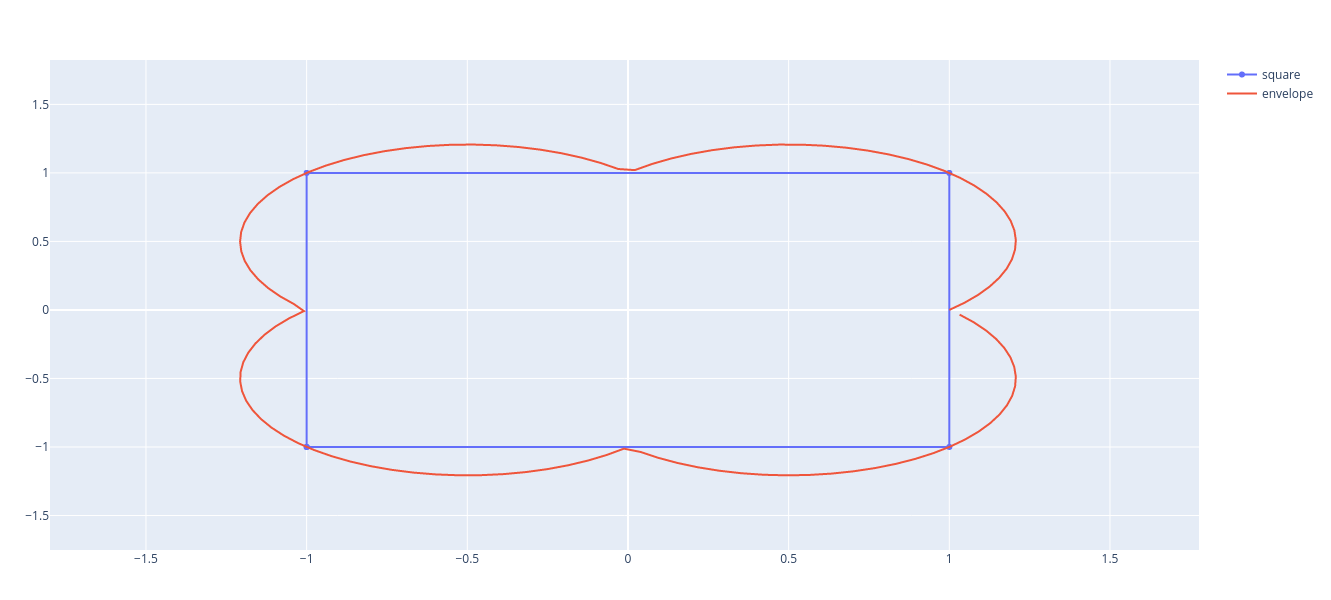

In [18]:
a = Point(-1.0,-1.0)
b = Point(1.0,-1.0)
c = Point(1.0,1.0)
d = Point(-1.0,1.0)

p = Polygon([a,b,c,d])
p1 = plotgeometry(p, name="square")
p2 = plotenvelope(p)

plot([p1,p2], layout)

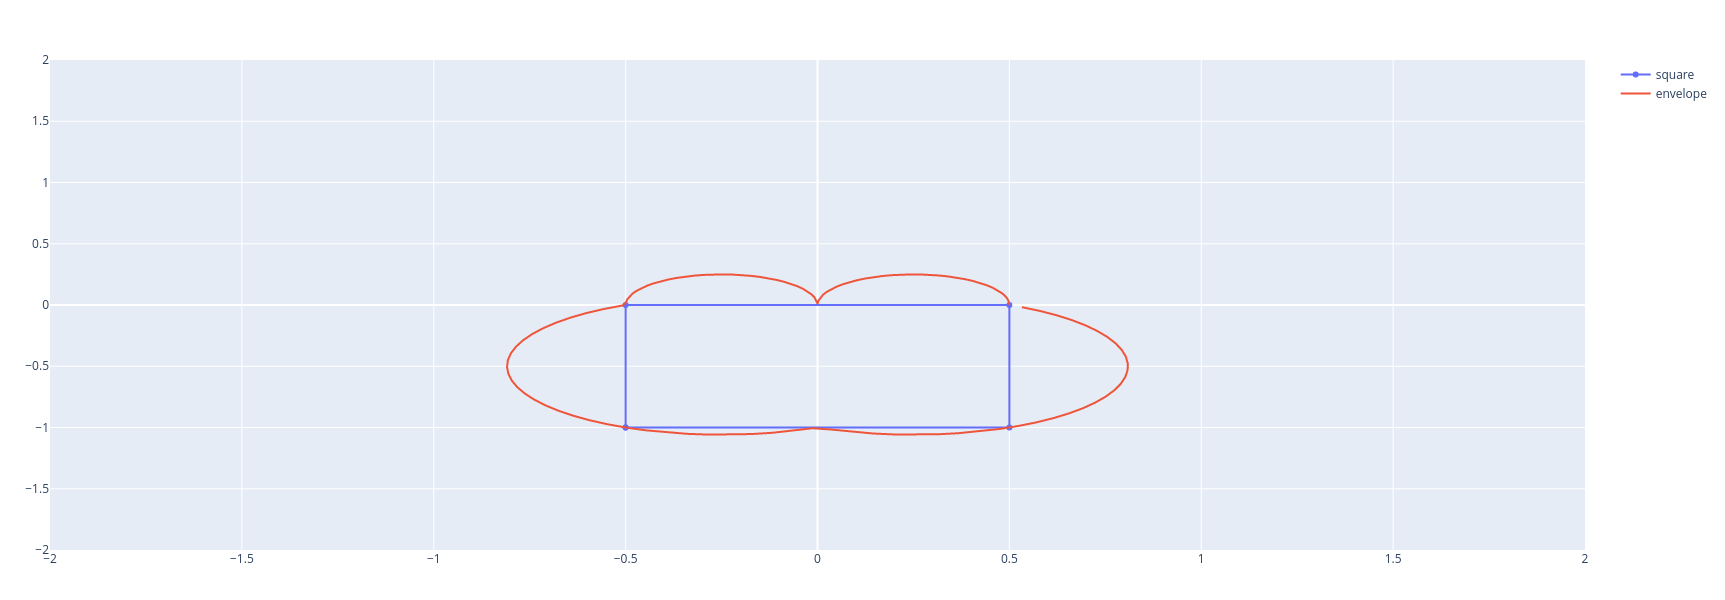

In [19]:
a = Point(-0.5,-1.0)
b = Point(0.5,-1.0)
c = Point(0.5,0.0)
d = Point(-0.5,0.0)

p = Polygon([a,b,c,d])
p1 = plotgeometry(p, name="square")
p2 = plotenvelope(p)

plot([p1,p2], layout)

Next, let's apply rotation. Note that the envelope shape is rotated equally.

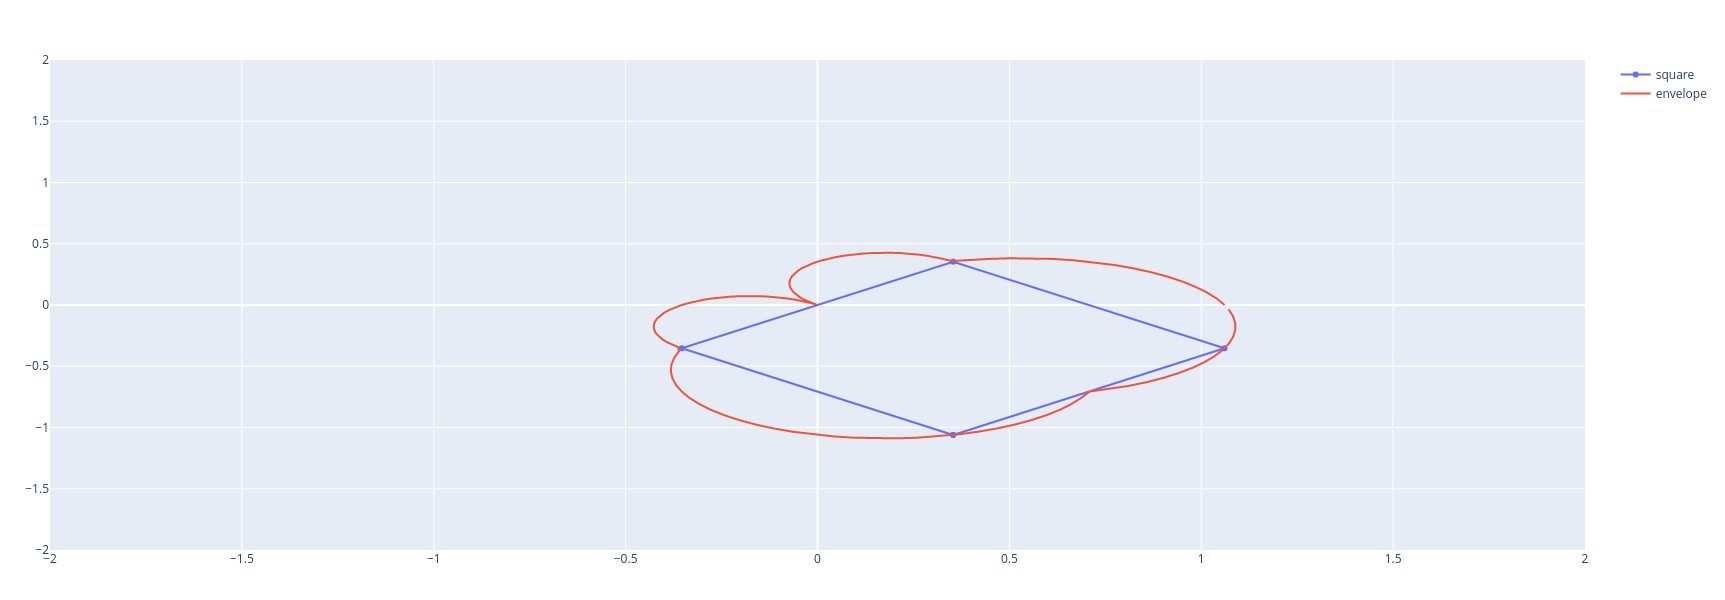

In [20]:
R = LinearMap(RotMatrix{2}(π/4))
s = transform(p,R)

p1 = plotgeometry(s, name="square")
p2 = plotenvelope(s)

plot([p1,p2], layout)

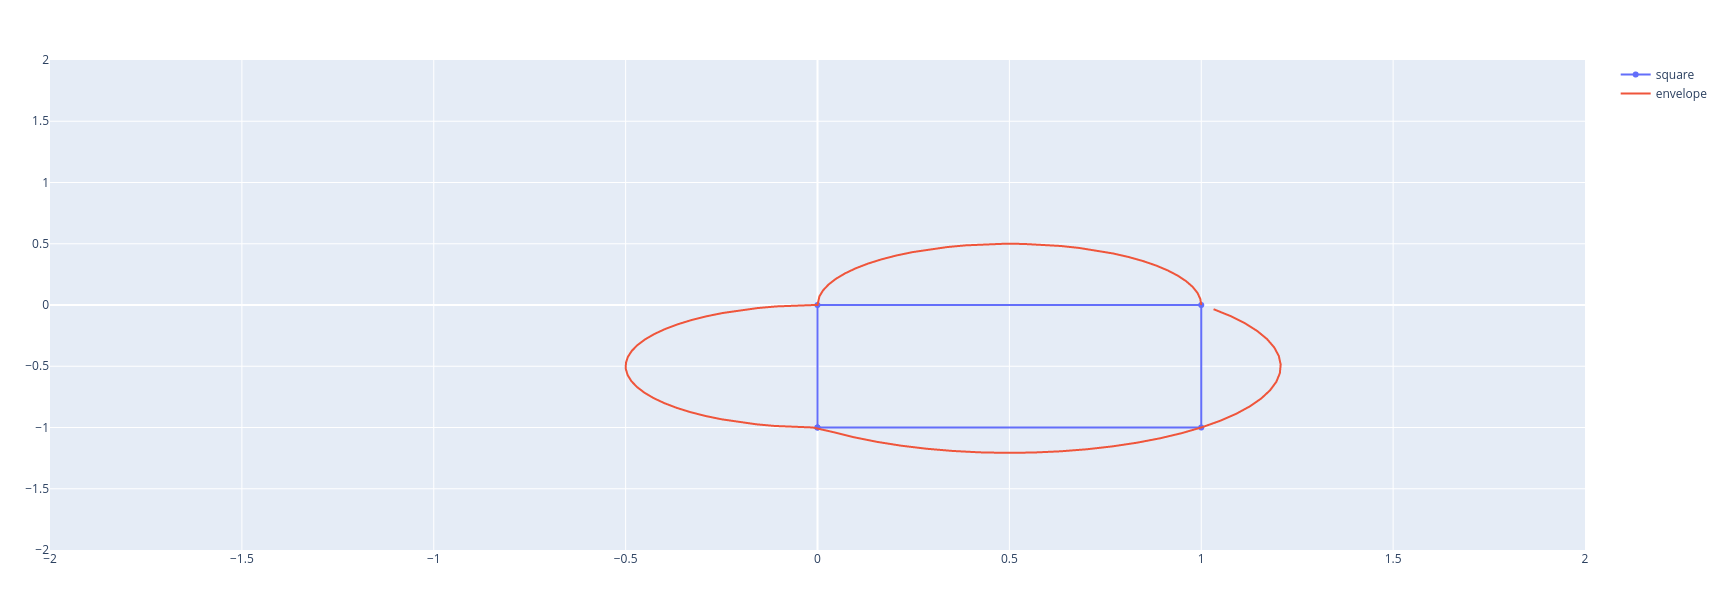

In [21]:
T = Translation(0.5, 0.0)
s = transform(p,T)

p1 = plotgeometry(s, name="square")
p2 = plotenvelope(s)

plot([p1,p2], layout)

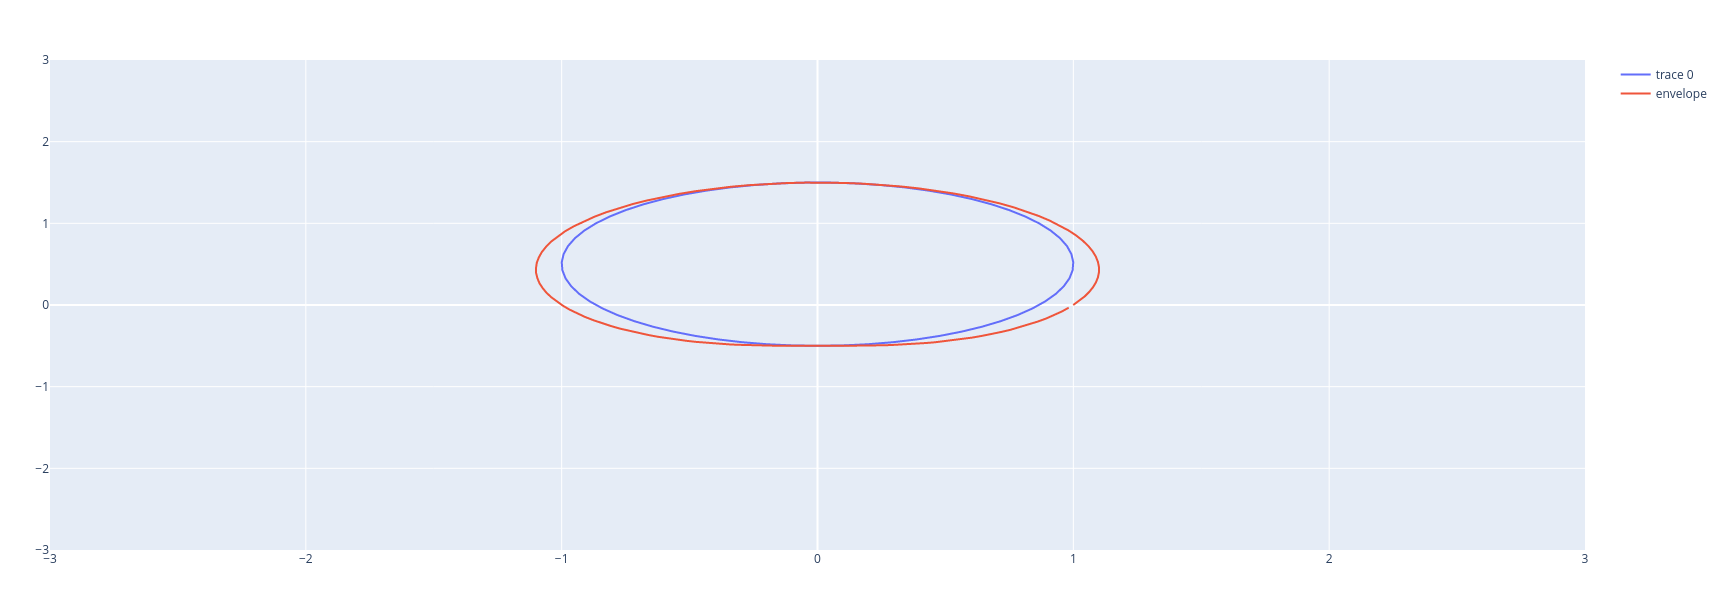

In [50]:
layout = Layout(
    xaxis = attr(range = [-3, 3]),
    yaxis = attr(range = [-3, 3]),
    width = 600,
    height = 600
)

c = Circle(Point(0,0.5), 1.)
pc = plotgeometry(c)
pe = plotenvelope(c)
plot([pc,pe],layout)